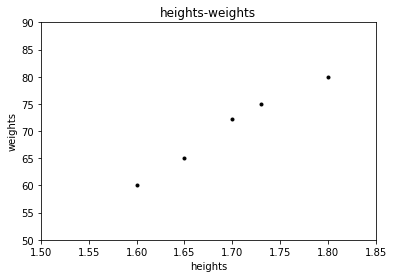

In [210]:
%matplotlib inline
import matplotlib.pyplot as plt
heights = [[1.6],[1.65],[1.7],[1.73],[1.8]]
weights = [[60],[65],[72.3],[75],[80]]
plt.title('heights-weights')
plt.xlabel('heights')
plt.ylabel('weights')
plt.plot(heights, weights, 'k. ')
plt.axis([1.5,1.85,50,90])
plt.plot(heights, model.predict(heights), color='r')
plt.show()

In [211]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X=heights, y=weights)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [212]:
model.intercept_

array([-104.75454545])

In [213]:
model.coef_

array([[103.31046312]])

In [214]:
from sklearn.datasets import make_regression as mr
import statsmodels.api as sm
bias = 100
X0, y, w = mr(n_samples=200, n_features=1, bias=bias, noise=10, coef=True, random_state=1)
X = sm.add_constant(X0)
y = y.reshape(len(y),1)
w 

array(86.44794301)

In [215]:
import numpy as np
w = np.linalg.inv(X.T@X)@X.T@y
w

array([[99.79150869],
       [86.96171201]])

In [216]:
model = LinearRegression()
model.fit(X=X0, y=y)
model.coef_

array([[86.96171201]])

In [217]:
model.intercept_

array([99.79150869])

In [219]:
from sklearn.linear_model import SGDRegressor as SR
sgd_reg = SR(max_iter=5, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X,y.ravel())


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=5,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [220]:
sgd_reg.intercept_, sgd_reg.coef_

(array([50.69266639]), array([50.69266639, 86.63815801]))

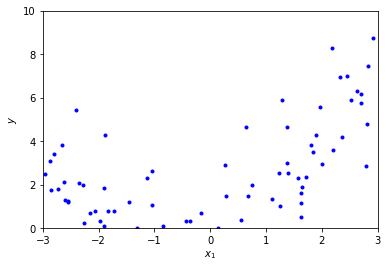

In [223]:
import numpy.random as rd
rd.seed(42)
m = 100
X=6*rd.rand(m,1)-3
y = 0.5*X**2 + X+2*rd.randn(m,1)
plt.plot(X,y,"b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.axis([-3, 3, 0, 10])
plt.show()

In [224]:
from sklearn.preprocessing import PolynomialFeatures as PF
poly_features = PF(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg=LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_ 

(array([-0.43730838]), array([[0.86733786, 0.62912527]]))

In [225]:
from sklearn.linear_model import Ridge as rg
from sklearn.pipeline import Pipeline as pl
from sklearn.preprocessing import StandardScaler as ss

rd.seed(42)
m=20
X=3*rd.rand(m,1)
y=1+0.5*X+rd.randn(m,1)/1.5
X_new = np.linspace(0,3,100).reshape(100,1)

In [234]:
def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-","g--","r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = pl([
                ("poly_features", PF(degree=10, include_bias=False)),
                ("std_scaler", ss()),
                ("regu_reg", model),
            ])
        model.fit(X,y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X,y,"b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0,3,0,4])

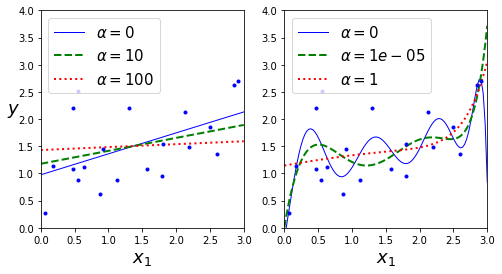

In [235]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(rg, polynomial=False, alphas=(0,10,100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(rg,polynomial=True, alphas=(0,10**-5,1), random_state=42)

plt.show()

In [236]:
from sklearn.linear_model import Lasso as LS
ls_reg = LS(alpha=0.1)
ls_reg.fit(X, y)
ls_reg.predict([[1.5]])


array([1.53788174])

In [237]:
from sklearn.linear_model import ElasticNet as EN
en = EN(alpha=0.1, l1_ratio=0.5, random_state=42)
en.fit(X,y)
en.predict([[1.5]])

array([1.54333232])